In [5]:
from google.colab import files
uploaded=files.upload()

Saving louise_visualization_data.csv to louise_visualization_data.csv


In [4]:
word_846=files.upload()

Saving words_846.csv to words_846 (1).csv


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
%matplotlib inline

In [9]:
# read data

twitter=pd.read_csv('louise_visualization_data.csv')
twitter.head()

,weeks_since_start,geo_group,nuclear facility,pheasant,mixed nuts,macadamia nuts,sardine,mortadella,gang,parmesan,morel,barbecue,milk,blueberries,clementines,pineapple juice,basque separatists,peanut,gerber,swat,terror,breach,cress,southwest,service disruption,vanilla extract,ginger ale,italian dressing,phreaking,chicken noodle soup,peach mango,biological event,figs,chicken gumbo,faa,sonora,whiskey sour,first responder,asparagus,edam,...,ice cream,cyber security,mayonnaise,whey,tart,lime juice,chia seeds,cheese product,mustard,leak,palestine liberation front,minestrone soup,sesame,tequila sunrise,chicken vegetable,authorities,capers,ginger root,cream of wheat,exposure,nuclear threat,shootout,pate,persimmons,fruit salad,potato,mustard greens,scotch,soft serve,sesame seeds,pomegranate juice,chocolate covered,al qaeda,wmata,chicken breast,post_prism,weeks_since_start_pos,month_since_start,pmss,state
0,-22.0,obrien_iowa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,-6.0,1.0,iowa
1,-21.0,obrien_iowa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,-6.0,1.0,iowa
2,-20.0,obrien_iowa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,-5.0,2.0,iowa
3,-19.0,obrien_iowa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,-5.0,2.0,iowa
4,-18.0,obrien_iowa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,-5.0,2.0,iowa


In [10]:
word_list=pd.read_csv('words_846.csv')
word_list.head()

,words,category,monitored
0,2600,Cybersecurity,1
1,abu sayyaf,Terrorism,1
2,afghanistan,Terrorism,1
3,agent,Agencies,0
4,agriculture,Health concern,0


In [11]:
#get word list which are monitord
word_monitor_pd=word_list.loc[word_list['monitored']==1]
word_monitor_list=word_monitor_pd.words.unique()
header_list=np.append(["weeks_since_start",'geo_group','weeks_since_start_pos','month_since_start','pmss','state'],word_monitor_list)

In [12]:
#here we get the table we need to do analysis
twitter_monitored= twitter[twitter.columns.intersection(header_list)]
twitter_monitored.head()

,weeks_since_start,geo_group,nuclear facility,gang,basque separatists,swat,terror,breach,southwest,service disruption,phreaking,biological event,sonora,first responder,jihad,subway,biological,recruitment,cartel,port,afghanistan,hazardous,somalia,chemical weapon,exercise,iran,armed revolutionary forces colombia,radicals,china,industrial spill,juarez,metro,plf,airport,plume,palestine liberation organization,infrastructure security,hamas,cocaine,national preparedness,...,fort hancock,violence,militia,abu sayyaf,facility,chemical burn,electric outage,pirates,beltran-leyva,ricin,emergency management,smuggling,artistic assassins,chemical spill,sarin,los zetas,tucson,cikr,national infrastructure,nationalist,deaths,dndo,ddos,nbic,anthrax,shooting,narcotics,cyber security,leak,palestine liberation front,authorities,exposure,nuclear threat,shootout,al qaeda,wmata,weeks_since_start_pos,month_since_start,pmss,state
0,-22.0,obrien_iowa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,-6.0,1.0,iowa
1,-21.0,obrien_iowa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,-6.0,1.0,iowa
2,-20.0,obrien_iowa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,-5.0,2.0,iowa
3,-19.0,obrien_iowa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,-5.0,2.0,iowa
4,-18.0,obrien_iowa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,-5.0,2.0,iowa


In [13]:
#from this table, first let's do some aggregation using month_since_start 
twitter_monitored['month_split']=np.where(twitter_monitored['month_since_start']<0,'before','after')
twitter_monitored_group=twitter_monitored.groupby(['month_split']).sum().reset_index()
twitter_monitored_group_month=twitter_monitored_group.drop(['month_since_start','weeks_since_start','weeks_since_start_pos','pmss'],axis=1)
twitter_monitored_group_month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month_split,nuclear facility,gang,basque separatists,swat,terror,breach,southwest,service disruption,phreaking,biological event,sonora,first responder,jihad,subway,biological,recruitment,cartel,port,afghanistan,hazardous,somalia,chemical weapon,exercise,iran,armed revolutionary forces colombia,radicals,china,industrial spill,juarez,metro,plf,airport,plume,palestine liberation organization,infrastructure security,hamas,cocaine,national preparedness,cloud,...,disaster management,plo,national security,shots fired,fort hancock,violence,militia,abu sayyaf,facility,chemical burn,electric outage,pirates,beltran-leyva,ricin,emergency management,smuggling,artistic assassins,chemical spill,sarin,los zetas,tucson,cikr,national infrastructure,nationalist,deaths,dndo,ddos,nbic,anthrax,shooting,narcotics,cyber security,leak,palestine liberation front,authorities,exposure,nuclear threat,shootout,al qaeda,wmata
0,after,522,1088843,17,59440,638671,52026,82028,913,222,1,142290,1115,70111,689593,53429,169609,282849,366098,145164,25314,53099,6006,554525,483596,0,13620,1857237,24,37669,937376,1350,2290668,26407,0,85,27261,421452,43,641431,...,1425,38374,20306,27947,12,461621,18575,21,86393,461,13,331775,13,9862,656,26175,20,617,21449,1038,51435,60,181,11781,186268,1373,22763,60,10985,1309903,13442,4087,324724,0,124058,119956,537,58062,1821,1860
1,before,661,879684,2,52435,480255,30989,70479,428,228,0,120796,1139,51408,585846,43359,116898,213137,285700,112079,20745,38600,1567,481369,246884,0,10845,1364293,7,30643,776495,948,1389557,23887,0,32,22815,314925,4,525315,...,422,31519,13017,13002,4,430254,14144,134,68720,331,12,168858,8,22717,569,19059,2,459,7473,695,41418,42,95,7615,144070,928,20875,31,14822,1088678,16827,3773,139657,0,107878,95616,1040,70385,1339,1898


In [14]:
twitter_monitored_group_month=twitter_monitored_group_month.drop(['month_split'],axis=1)
twitter_monitored_group_month=twitter_monitored_group_month.transpose()


In [15]:
twitter_monitored_group_month=twitter_monitored_group_month.reset_index()
#rename it, 0 is after, 1 is before
twitter_monitored_group_month=twitter_monitored_group_month.rename(columns={'index':'word',0: "after", 1: "before"})
twitter_monitored_group_month['change']=twitter_monitored_group_month['after']-twitter_monitored_group_month['before']
twitter_monitored_group_month['change_abs']=twitter_monitored_group_month['change'].abs()
twitter_monitored_group_month_sort=twitter_monitored_group_month.sort_values(by=['change_abs'],ascending=False)

In [16]:
twitter_monitored_group_month_sort_head=twitter_monitored_group_month_sort.head(10)
twitter_monitored_group_month_sort_head

,word,after,before,change,change_abs
31,airport,2290668,1389557,901111,901111
236,power,4186714,3428313,758401,758401
237,burn,1889269,1167244,722025,722025
200,mexico,1489753,843903,645850,645850
26,china,1857237,1364293,492944,492944
189,gas,1947619,1478410,469209,469209
74,police,2476418,2027856,448562,448562
220,smart,2319153,1936621,382532,382532
107,attack,2028917,1655026,373891,373891
102,colombia,1050223,685507,364716,364716


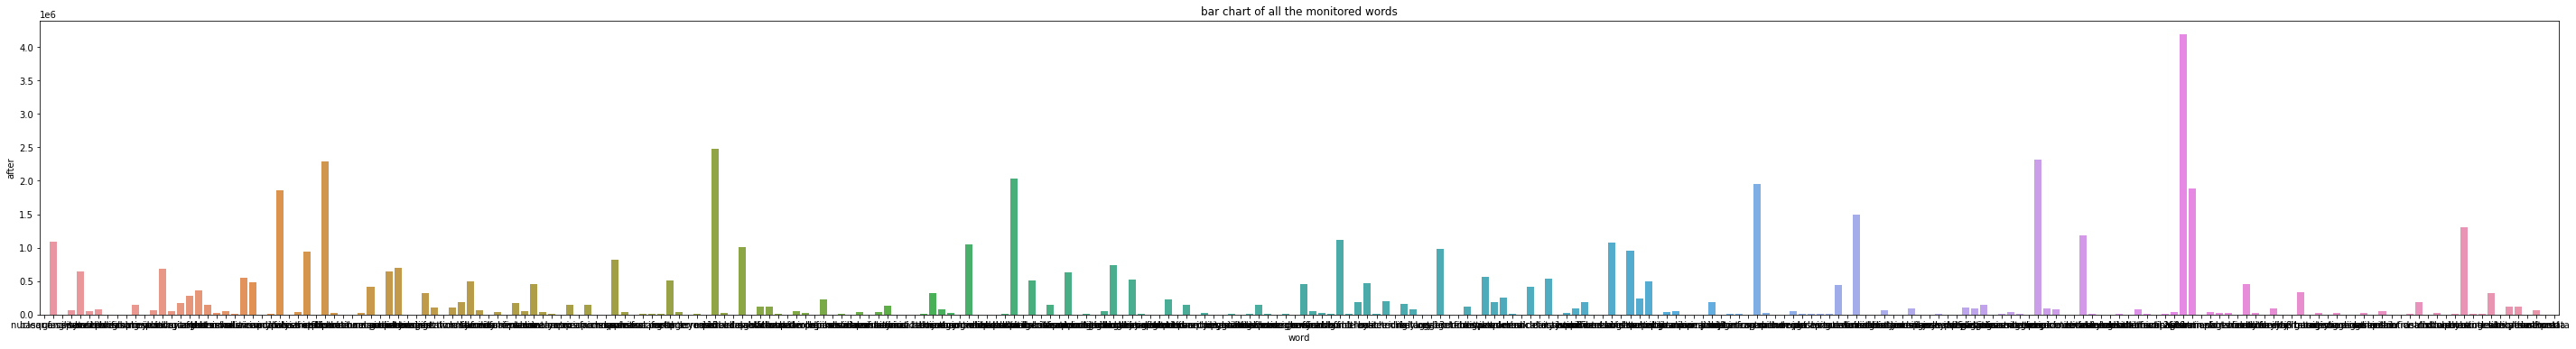

In [17]:
#first show whole picture of all the monitored words 
fig,ax=plt.subplots(figsize=(50,6))
sns.barplot(x=twitter_monitored_group_month['word'],y=twitter_monitored_group_month['before'],data=twitter_monitored_group_month)
sns.barplot(x=twitter_monitored_group_month['word'],y=twitter_monitored_group_month['after'],data=twitter_monitored_group_month)
ax.set_title("bar chart of all the monitored words")
plt.show()

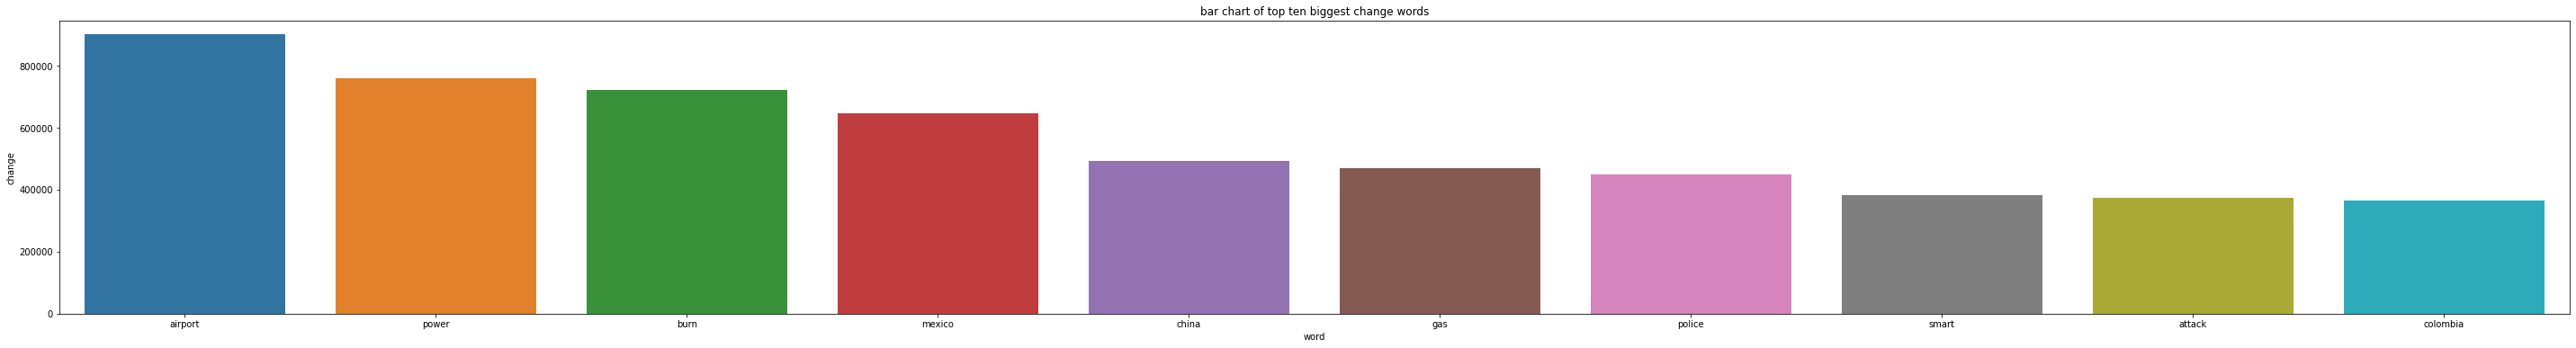

In [18]:
#first show whole picture of all the monitored words 
fig,ax=plt.subplots(figsize=(50,6))
sns.barplot(x=twitter_monitored_group_month_sort_head['word'],y=twitter_monitored_group_month_sort_head['change'],data=twitter_monitored_group_month_sort_head)
ax.set_title("bar chart of top ten biggest change words")
plt.rcParams.update({'font.size': 28})
plt.show()

Analyze for each state

In [19]:
#group by before and after, state
twitter_monitored_group2=twitter_monitored.groupby(['month_split','state']).sum().reset_index()
twitter_monitored_group2_month=twitter_monitored_group2.drop(['month_since_start','weeks_since_start','weeks_since_start_pos','pmss'],axis=1)
twitter_monitored_group2_month_after=twitter_monitored_group2_month.loc[twitter_monitored_group2_month['month_split']=='after',:]
twitter_monitored_group2_month_after.head()

,month_split,state,nuclear facility,gang,basque separatists,swat,terror,breach,southwest,service disruption,phreaking,biological event,sonora,first responder,jihad,subway,biological,recruitment,cartel,port,afghanistan,hazardous,somalia,chemical weapon,exercise,iran,armed revolutionary forces colombia,radicals,china,industrial spill,juarez,metro,plf,airport,plume,palestine liberation organization,infrastructure security,hamas,cocaine,national preparedness,...,disaster management,plo,national security,shots fired,fort hancock,violence,militia,abu sayyaf,facility,chemical burn,electric outage,pirates,beltran-leyva,ricin,emergency management,smuggling,artistic assassins,chemical spill,sarin,los zetas,tucson,cikr,national infrastructure,nationalist,deaths,dndo,ddos,nbic,anthrax,shooting,narcotics,cyber security,leak,palestine liberation front,authorities,exposure,nuclear threat,shootout,al qaeda,wmata
0,after,US,0,13121,0,276,6154,226,340,8,0,0,2009,3,466,11631,241,642,1890,11206,471,94,322,15,3250,1795,0,69,12365,0,630,45727,14,104518,327,0,0,107,1108,0,...,9,770,40,54,0,1679,60,0,440,3,0,2506,0,39,0,122,0,2,89,7,167,2,2,69,535,23,91,0,77,7177,53,13,1117,0,274,475,0,195,17,27
1,after,alabama,0,155,0,9,7,0,15,0,0,0,1,0,1,124,7,15,4,19,5,1,1,0,46,3,0,0,67,0,3,9,0,185,2,0,0,0,50,0,...,0,0,0,1,0,28,1,0,21,0,0,22,0,0,0,2,0,0,0,0,0,0,0,0,7,0,0,0,1,187,6,0,31,0,1,9,0,7,0,0
2,after,alaska,0,10,0,3,1,1,2,0,0,0,0,0,0,17,1,0,0,16,1,0,0,0,0,1,0,1,7,0,0,1,0,128,0,0,0,0,5,0,...,0,0,0,0,0,1,0,0,10,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,19,0,0,3,0,0,0,0,1,0,0
3,after,arizona,0,98,0,9,12,4,48,0,0,0,31,0,0,139,10,25,44,25,7,1,1,0,33,2,0,0,49,0,2,69,0,987,0,0,0,0,79,0,...,0,0,0,5,0,24,2,0,15,0,0,22,0,4,0,5,0,0,1,0,1126,0,0,0,21,0,0,0,2,175,4,1,28,0,39,14,0,6,1,0
4,after,arkansas,0,46,0,4,2,3,18,0,0,0,1,0,0,46,2,7,3,5,2,3,0,0,18,1,0,0,23,0,0,5,0,97,1,0,0,0,13,0,...,0,0,1,0,0,7,1,0,8,0,0,17,0,1,0,1,0,1,0,0,1,0,0,0,4,0,0,0,0,80,0,0,4,0,1,2,0,3,0,0


In [20]:
twitter_monitored_group2_month_before=twitter_monitored_group2_month.loc[twitter_monitored_group2_month['month_split']=='before',:]
twitter_monitored_group2_month_before.head()

,month_split,state,nuclear facility,gang,basque separatists,swat,terror,breach,southwest,service disruption,phreaking,biological event,sonora,first responder,jihad,subway,biological,recruitment,cartel,port,afghanistan,hazardous,somalia,chemical weapon,exercise,iran,armed revolutionary forces colombia,radicals,china,industrial spill,juarez,metro,plf,airport,plume,palestine liberation organization,infrastructure security,hamas,cocaine,national preparedness,...,disaster management,plo,national security,shots fired,fort hancock,violence,militia,abu sayyaf,facility,chemical burn,electric outage,pirates,beltran-leyva,ricin,emergency management,smuggling,artistic assassins,chemical spill,sarin,los zetas,tucson,cikr,national infrastructure,nationalist,deaths,dndo,ddos,nbic,anthrax,shooting,narcotics,cyber security,leak,palestine liberation front,authorities,exposure,nuclear threat,shootout,al qaeda,wmata
52,before,US,0,8916,0,186,4663,152,183,1,0,0,1915,7,280,11677,213,578,1673,8137,441,105,250,5,3370,1507,0,37,11088,0,724,47493,8,70767,315,0,0,77,767,0,...,4,503,34,19,0,1567,38,3,355,4,0,1490,0,35,4,88,0,3,48,7,117,2,1,52,437,26,92,0,69,5180,38,4,685,0,215,325,3,186,11,45
53,before,alabama,0,108,0,9,6,0,19,0,0,0,0,0,1,152,4,5,11,10,7,2,0,0,33,7,0,2,72,0,0,18,0,171,0,0,0,0,50,0,...,0,0,0,2,0,30,2,0,10,0,0,10,0,1,0,0,0,0,0,0,2,0,0,0,5,0,0,0,0,173,7,0,12,0,2,8,1,3,0,0
54,before,alaska,0,6,0,0,0,0,1,0,0,0,0,0,0,22,0,0,0,8,5,0,0,0,3,0,0,0,12,0,0,1,0,89,0,0,0,0,7,0,...,0,0,0,0,0,2,0,0,3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,12,0,0,1,0,1,2,0,1,0,0
55,before,arizona,0,90,0,13,14,1,50,0,0,0,23,0,2,149,3,1,49,28,1,1,0,0,52,6,0,2,56,0,1,119,0,725,1,0,0,0,64,0,...,0,0,2,1,0,30,1,0,16,0,0,18,0,3,0,6,0,0,0,0,1197,0,0,0,11,0,0,0,2,157,2,0,9,0,23,6,0,6,0,0
56,before,arkansas,0,42,0,2,2,0,10,0,0,0,0,0,0,62,4,2,3,8,1,0,0,0,18,4,0,1,26,0,0,5,0,98,0,0,0,1,25,0,...,0,0,1,1,0,13,0,0,7,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,74,3,0,4,0,1,1,0,1,0,0


In [21]:
twitter_monitored_group2_month_head=twitter_monitored_group2_month_after['state']
twitter_monitored_group2_month_after=twitter_monitored_group2_month_after.iloc[:,2:]
twitter_monitored_group2_month_before=twitter_monitored_group2_month_before.iloc[:,2:]

In [22]:
twitter_monitored_group2_month_before=twitter_monitored_group2_month_before.reset_index().drop('index',axis=1)

In [23]:
#get word count absolute change of before and after
twitter_monitored_group2_month_change=twitter_monitored_group2_month_after-twitter_monitored_group2_month_before
twitter_monitored_group2_month_change=twitter_monitored_group2_month_change.abs()
#twitter_monitored_group2_month_change['state']=twitter_monitored_group2_month_head
twitter_monitored_group2_month_change.head()

,nuclear facility,gang,basque separatists,swat,terror,breach,southwest,service disruption,phreaking,biological event,sonora,first responder,jihad,subway,biological,recruitment,cartel,port,afghanistan,hazardous,somalia,chemical weapon,exercise,iran,armed revolutionary forces colombia,radicals,china,industrial spill,juarez,metro,plf,airport,plume,palestine liberation organization,infrastructure security,hamas,cocaine,national preparedness,cloud,social media,...,disaster management,plo,national security,shots fired,fort hancock,violence,militia,abu sayyaf,facility,chemical burn,electric outage,pirates,beltran-leyva,ricin,emergency management,smuggling,artistic assassins,chemical spill,sarin,los zetas,tucson,cikr,national infrastructure,nationalist,deaths,dndo,ddos,nbic,anthrax,shooting,narcotics,cyber security,leak,palestine liberation front,authorities,exposure,nuclear threat,shootout,al qaeda,wmata
0,0,4205,0,90,1491,74,157,7,0,0,94,4,186,46,28,64,217,3069,30,11,72,10,120,288,0,32,1277,0,94,1766,6,33751,12,0,0,30,341,0,332,658,...,5,267,6,35,0,112,22,3,85,1,0,1016,0,4,4,34,0,1,41,0,50,0,1,17,98,3,1,0,8,1997,15,9,432,0,59,150,3,9,6,18
1,0,47,0,0,1,0,4,0,0,0,1,0,0,28,3,10,7,9,2,1,1,0,13,4,0,2,5,0,3,9,0,14,2,0,0,0,0,0,5,43,...,0,0,0,1,0,2,1,0,11,0,0,12,0,1,0,2,0,0,0,0,2,0,0,0,2,0,0,0,1,14,1,0,19,0,1,1,1,4,0,0
2,0,4,0,3,1,1,1,0,0,0,0,0,0,5,1,0,0,8,4,0,0,0,3,1,0,1,5,0,0,0,0,39,0,0,0,0,2,0,2,1,...,0,0,0,0,0,1,0,0,7,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,7,0,0,2,0,1,2,0,0,0,0
3,0,8,0,4,2,3,2,0,0,0,8,0,2,10,7,24,5,3,6,0,1,0,19,4,0,2,7,0,1,50,0,262,1,0,0,0,15,0,16,71,...,0,0,2,4,0,6,1,0,1,0,0,4,0,1,0,1,0,0,1,0,71,0,0,0,10,0,0,0,0,18,2,1,19,0,16,8,0,0,1,0
4,0,4,0,2,0,3,8,0,0,0,1,0,0,16,2,5,0,3,1,3,0,0,0,3,0,1,3,0,0,0,0,1,1,0,0,1,12,0,3,11,...,0,0,0,1,0,6,1,0,1,0,0,8,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,6,3,0,0,0,0,1,0,2,0,0


In [24]:
#find the max word with the max number for each state
twitter_monitored_group2_month_change['max_value'] = twitter_monitored_group2_month_change.max(axis=1)
twitter_monitored_group2_month_change['max_word'] = twitter_monitored_group2_month_change.idxmax(axis=1)


In [25]:
twitter_monitored_group2_month_change['state']=twitter_monitored_group2_month_head
twitter_monitored_group2_month_change.head()

,nuclear facility,gang,basque separatists,swat,terror,breach,southwest,service disruption,phreaking,biological event,sonora,first responder,jihad,subway,biological,recruitment,cartel,port,afghanistan,hazardous,somalia,chemical weapon,exercise,iran,armed revolutionary forces colombia,radicals,china,industrial spill,juarez,metro,plf,airport,plume,palestine liberation organization,infrastructure security,hamas,cocaine,national preparedness,cloud,social media,...,shots fired,fort hancock,violence,militia,abu sayyaf,facility,chemical burn,electric outage,pirates,beltran-leyva,ricin,emergency management,smuggling,artistic assassins,chemical spill,sarin,los zetas,tucson,cikr,national infrastructure,nationalist,deaths,dndo,ddos,nbic,anthrax,shooting,narcotics,cyber security,leak,palestine liberation front,authorities,exposure,nuclear threat,shootout,al qaeda,wmata,max_value,max_word,state
0,0,4205,0,90,1491,74,157,7,0,0,94,4,186,46,28,64,217,3069,30,11,72,10,120,288,0,32,1277,0,94,1766,6,33751,12,0,0,30,341,0,332,658,...,35,0,112,22,3,85,1,0,1016,0,4,4,34,0,1,41,0,50,0,1,17,98,3,1,0,8,1997,15,9,432,0,59,150,3,9,6,18,33751,airport,US
1,0,47,0,0,1,0,4,0,0,0,1,0,0,28,3,10,7,9,2,1,1,0,13,4,0,2,5,0,3,9,0,14,2,0,0,0,0,0,5,43,...,1,0,2,1,0,11,0,0,12,0,1,0,2,0,0,0,0,2,0,0,0,2,0,0,0,1,14,1,0,19,0,1,1,1,4,0,0,73,gas,alabama
2,0,4,0,3,1,1,1,0,0,0,0,0,0,5,1,0,0,8,4,0,0,0,3,1,0,1,5,0,0,0,0,39,0,0,0,0,2,0,2,1,...,0,0,1,0,0,7,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,7,0,0,2,0,1,2,0,0,0,0,39,airport,alaska
3,0,8,0,4,2,3,2,0,0,0,8,0,2,10,7,24,5,3,6,0,1,0,19,4,0,2,7,0,1,50,0,262,1,0,0,0,15,0,16,71,...,4,0,6,1,0,1,0,0,4,0,1,0,1,0,0,1,0,71,0,0,0,10,0,0,0,0,18,2,1,19,0,16,8,0,0,1,0,262,airport,arizona
4,0,4,0,2,0,3,8,0,0,0,1,0,0,16,2,5,0,3,1,3,0,0,0,3,0,1,3,0,0,0,0,1,1,0,0,1,12,0,3,11,...,1,0,6,1,0,1,0,0,8,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,6,3,0,0,0,0,1,0,2,0,0,44,police,arkansas


In [26]:
#table for top word of each state
twitter_monitored_group2_topword_each_state=twitter_monitored_group2_month_change.iloc[:,-3:]
twitter_monitored_group2_topword_each_state

,max_value,max_word,state
0,33751,airport,US
1,73,gas,alabama
2,39,airport,alaska
3,262,airport,arizona
4,44,police,arkansas
5,1061,airport,california
6,140,airport,colorado
7,46,power,connecticut
8,23,gas,delaware
9,188,gas,florida


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

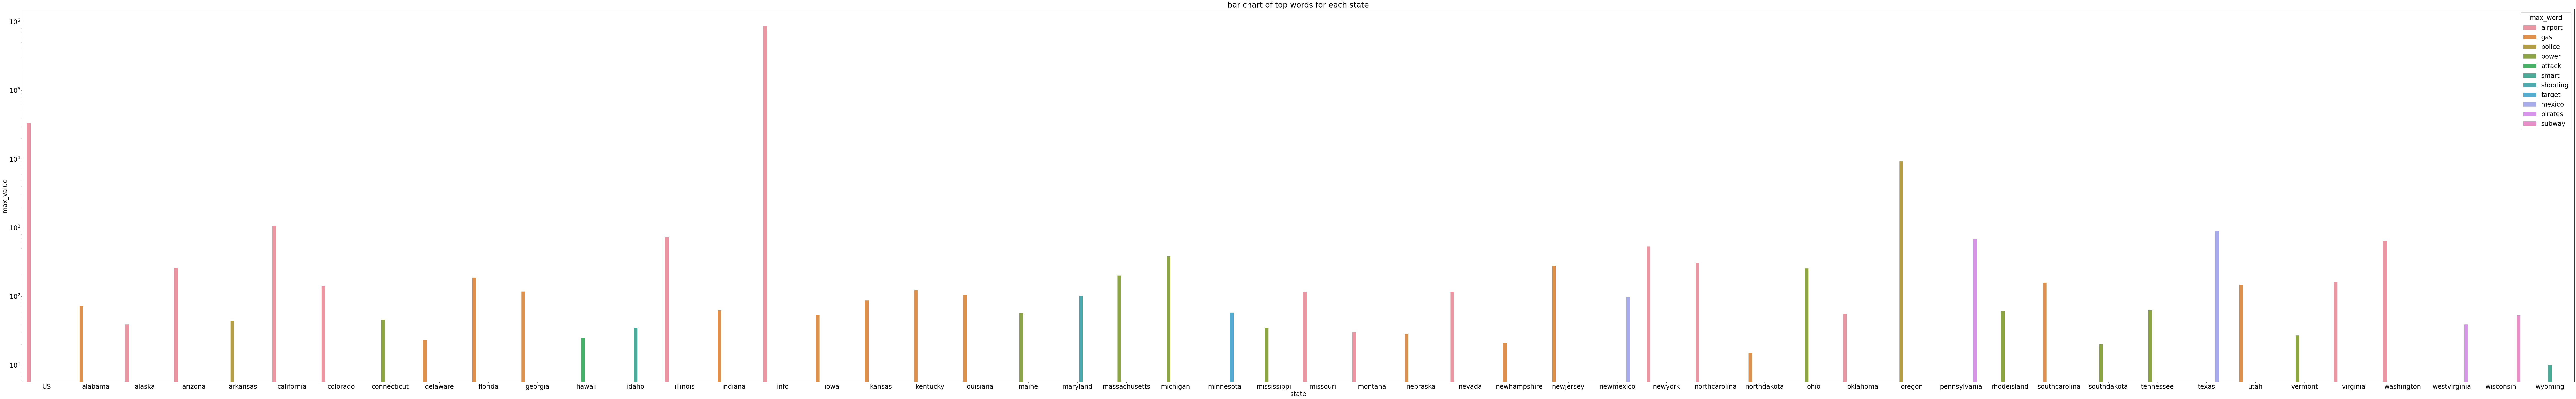

In [27]:
#plot the top word in each state
from google.colab import files
fig,ax=plt.subplots(figsize=(200,30))
sns.barplot(x=twitter_monitored_group2_topword_each_state['state'],y=twitter_monitored_group2_topword_each_state['max_value'],hue=twitter_monitored_group2_topword_each_state['max_word'],data=twitter_monitored_group2_topword_each_state)
ax.set_title("bar chart of top words for each state")
ax.set_yscale('log')
plt.rcParams.update({'font.size': 28})
fig.savefig('graph.png')
files.download('graph.png')
plt.show()
